<a href="https://colab.research.google.com/github/i-ninte/phrontlyne/blob/main/phrontlyne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pytesseract

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


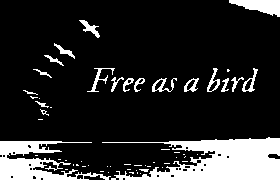

Extracted Text:
 —_

ows
es
Free as a bird



In [32]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found or could not be loaded.")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # Use morphological operations to remove noise and enhance the image
    kernel = np.ones((2, 2), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Display the processed image
    cv2_imshow(morph)

    return morph

def ocr_image(image):
    # Use Tesseract to do OCR on the processed image
    text = pytesseract.image_to_string(image)
    return text

def extract_text_from_image(image_path):
    processed_image = preprocess_image(image_path)
    text = ocr_image(processed_image)
    return text

# Example usage
image_path = 'fr.jpg'
extracted_text = extract_text_from_image(image_path)
print("Extracted Text:\n", extracted_text)


In [33]:
extracted_text

'—_\n\nows\nes\nFree as a bird\n\x0c'

**Variant**

Saving download (4).jpg to download (4).jpg


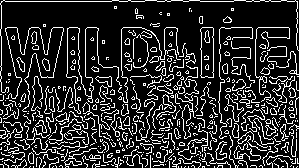

Extracted Text:
  



In [36]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found or could not be loaded.")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding for better handling of varying lighting conditions
    adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY_INV, 11, 2)

    # Use morphological operations to remove noise and enhance the image
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # Apply Canny edge detection to highlight text contours
    edges = cv2.Canny(morph, 100, 200)

    # Display the processed image
    cv2_imshow(edges)

    return edges

def ocr_image(image):
    # Use Tesseract to do OCR on the processed image
    text = pytesseract.image_to_string(image)
    return text

def extract_text_from_image(image_path):
    processed_image = preprocess_image(image_path)
    text = ocr_image(processed_image)
    return text

# Example usage
from google.colab import files
uploaded = files.upload()

# Use the uploaded image file for text extraction and querying the database
image_path = list(uploaded.keys())[0]  # Get the file name
extracted_text = extract_text_from_image(image_path)
print("Extracted Text:\n", extracted_text)


In [37]:
extracted_text

' \n\x0c'

**USING KERAS OCR**

In [38]:
!pip install keras-ocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.1 MB/s eta 0:00:00


Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


Saving download (5).jpg to download (5) (1).jpg


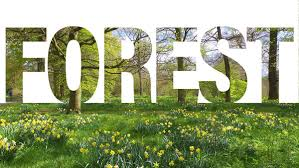

1/1 [==============================] - 3s 3s/step
Extracted Text:
 forest


In [39]:
import keras_ocr
import cv2
from google.colab.patches import cv2_imshow

# Initialize the pipeline
pipeline = keras_ocr.pipeline.Pipeline()

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found or could not be loaded.")

    # Display the original image
    cv2_imshow(image)

    return image

def ocr_image(image):
    # Perform OCR using keras-ocr pipeline
    prediction_groups = pipeline.recognize([image])

    # Extract text from the predictions
    text = ' '.join([word[0] for word in prediction_groups[0]])
    return text

def extract_text_from_image(image_path):
    image = preprocess_image(image_path)
    text = ocr_image(image)
    return text

# Example usage
from google.colab import files
uploaded = files.upload()

# Use the uploaded image file for text extraction
image_path = list(uploaded.keys())[0]  # Get the file name
extracted_text = extract_text_from_image(image_path)
print("Extracted Text:\n", extracted_text)


In [40]:
extracted_text

'forest'

**EASY OCR**

In [42]:
!pip install easyocr


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Saving download (3).jpg to download (3).jpg


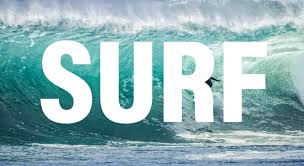

Extracted Text:
 SURF


In [43]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

# Initialize the reader
reader = easyocr.Reader(['en'])

def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file '{image_path}' not found or could not be loaded.")

    # Display the original image
    cv2_imshow(image)

    return image

def ocr_image(image):
    # Perform OCR using easyocr
    results = reader.readtext(image)

    # Extract text from the results
    text = ' '.join([result[1] for result in results])
    return text

def extract_text_from_image(image_path):
    image = preprocess_image(image_path)
    text = ocr_image(image)
    return text

# Example usage
from google.colab import files
uploaded = files.upload()

# Use the uploaded image file for text extraction
image_path = list(uploaded.keys())[0]  # Get the file name
extracted_text = extract_text_from_image(image_path)
print("Extracted Text:\n", extracted_text)


In [10]:
import sqlite3

# Create a new SQLite database (or connect to an existing one)
db_name = 'example.db'
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

# Create a new table
table_creation_query = '''
CREATE TABLE IF NOT EXISTS dictionary (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    sample_text TEXT NOT NULL
)
'''
cursor.execute(table_creation_query)


In [12]:

# Insert some sample data into the table
sample_data = [
    ('Sample text 1',),
    ('Sample text 2',),
    ('Another sample text',)
]

insert_query = 'INSERT INTO dictionary (sample_text) VALUES (?)'
cursor.executemany(insert_query, sample_data)

# Commit the transaction
conn.commit()


In [14]:

# Display the tables in the database
def display_tables(conn):
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print("Tables in the database:")
    for table in tables:
        print(table[0])

# Function to display all rows in a specific table
def display_table_contents(conn, table_name):
    cursor = conn.cursor()
    cursor.execute(f"SELECT * FROM {table_name}")
    rows = cursor.fetchall()
    print(f"Contents of table '{table_name}':")
    for row in rows:
        print(row)

# Display the tables
display_tables(conn)

# Display the contents of the table
display_table_contents(conn, 'dictionary')

# Close the connection
conn.close()


Tables in the database:
dictionary
sqlite_sequence
Contents of table 'dictionary':
(1, 'Sample text 1')
(2, 'Sample text 2')
(3, 'Another sample text')
